In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from v1dd_public import ARTIFACT_DIR
import seaborn as sns


In [21]:
mouse_colors = {'slc2': "#66CCEE", 'slc4': "#228833", 'slc5': '#CCBB44', 'teto1': '#EE6677'}
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]
z_groups_high_to_low = [[575, 600, 625], [650, 675, 700, 725], [500, 525, 550], [482, 498, 514], [434, 450, 466], \
    [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]
z_groups_low_to_high = [[50, 66, 82], [98, 114, 130], [146, 162, 178], [194, 210, 226], [242, 258, 274], [290, 306, 322], [338, 354, 370], \
    [386, 402, 418], [434, 450, 466], [482, 498, 514], [500, 525, 550], [575, 600, 625], [650, 675, 700, 725]]

z_groups_high_to_low = [[50], [66], [82], [98], [114], [130], [146], [162], [178], [194], [210], [226], \
    [242], [258], [274], [290], [306], [322], [338], [354], [370], [386], [402], [418], \
    [434], [450], [466], [482], [498], [514], [500], [525], [550], [575], [600], [625], \
    [650], [675], [700], [725]]
z_groups_low_to_high = [[50], [66], [82], [98], [114], [130], [146], [162], [178], [194], [210], [226], \
    [242], [258], [274], [290], [306], [322], [338], [354], [370], [386], [402], [418], \
    [434], [450], [466], [482], [498], [514], [500], [525], [550], [575], [600], [625], \
    [650, 675, 700, 725]]

In [22]:
stim_types = [
    "drifting_gratings_full", 
    "drifting_gratings_windowed", 
    "natural_images_12", 
    "natural_images"
    ]
decode_dims = {
    "drifting_gratings_full": ["direction", "spatial"],
    "drifting_gratings_windowed": ["direction", "spatial"],
    "natural_images_12": ["image_index"],
    "natural_images": ["image_index"]
               }
repetitions = 1000

chance = {
    "drifting_gratings_full_direction": 1/12, 
    "drifting_gratings_full_spatial": 1/2, 
    "drifting_gratings_full_direction_spatial": 1/24, 
    "drifting_gratings_windowed_direction": 1/12, 
    "drifting_gratings_windowed_spatial": 1/2, 
    "drifting_gratings_windowed_direction_spatial": 1/24, 
    "natural_images_12_image_index": 1/12,
    "natural_images_image_index": 1/118}

depth_mapping = {
    66: [50, 66, 82],
    114: [98, 114, 130], 
    162: [146, 162, 178],
    210: [194, 210, 226],
    258: [242, 258, 274],
    306: [290, 306, 322],
    354: [338, 354, 370],
    402: [386, 402, 418],
    450: [434, 450, 466],
    498: [482, 498, 514]
}

depths = [66,
    114, 
    162,
    210,
    258,
    306,
    354,
    402,
    450,
    498]

all_depths = [
    50, 66, 82,
    98, 114, 130,
    146, 162, 178,
    194, 210, 226,
    242, 258, 274,
    290, 306, 322,
    338, 354, 370,
    386, 402, 418,
    434, 450, 466,
    482, 498, 514,
    500, 525, 550, 575, 600, 625, 650, 675, 700, 725
]

In [23]:
def depth_volume_mapping(a, b):
    depth_values = {
        1: {1: 66, 4: 114},
        2: {1: 162, 4: 210},
        3: {1: 258, 4: 306},
        4: {1: 354, 4: 402},
        5: {1: 450, 4: 498},
    }

    return depth_values[a][b[1]]

def depth_volume_mapping_2(volume_id, plane):
    depth_values = {
            1: [50, 66, 82, 98, 114, 130],
            2: [146, 162, 178, 194, 210, 226],
            3: [242, 258, 274, 290, 306, 322],
            4: [338, 354, 370, 386, 402, 418],
            5: [434, 450, 466, 482, 498, 514],
            6: [500],
            7: [525],
            8: [550],
            9: [575],
            'a': [600],
            'b': [625],
            'c': [650],
            'd': [675],
            'e': [700],
            'f': [725]
        }
    
    return depth_values[volume_id][plane - 1]


In [32]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
# tag = "2025_0724_3"
# tag = "2025_0730_3"
# tag = "2025_0701_1"
# tag = "2025_0701_2"
# tag = "2025_0715_2"
tag = "2025_0721_1"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot1_Rep1')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

In [33]:
n_bootstrap = 1000
n_depths = len(all_depths)
mouse_ids_mod = [409828, 416296, 427836, 438833]
n_mice = len(mouse_ids_mod)
column_ids = [1, 2, 3, 4, 5]
n_columns = len(column_ids)
bootstrapped_data = np.zeros((n_bootstrap, n_depths, n_mice, n_columns))

stim_type = 'drifting_gratings_windowed'
decode_dim = 'direction'

for m, mouse_id in enumerate(mouse_ids_mod):
    for c, column_id in enumerate(column_ids):
        for z, depth in enumerate(all_depths):
                test_accuracies_mean = all_results_df[
                    (all_results_df['mouse_id'] == mouse_id) & 
                    (all_results_df['depth'] == depth) &
                    (all_results_df['stim_type'] == stim_type) &
                    (all_results_df['decode_dim'] == decode_dim) & 
                    (all_results_df['column_id'] == column_id)
                    ].test_accuracies_mean.values
                    
                if len(test_accuracies_mean) > 0:
                    bootstrapped_data[:, z, m, c] = test_accuracies_mean
                else:
                    print(f"Missing data for {stim_type}, {decode_dim}, {mouse_id}, {column_id}, {depth}")
                    bootstrapped_data[:, z, m, c] = np.nan
                    continue

bootstrapped_data = bootstrapped_data / (1/12)

Missing data for drifting_gratings_windowed, direction, 409828, 1, 50
Missing data for drifting_gratings_windowed, direction, 409828, 1, 66
Missing data for drifting_gratings_windowed, direction, 409828, 1, 82
Missing data for drifting_gratings_windowed, direction, 409828, 1, 98
Missing data for drifting_gratings_windowed, direction, 409828, 1, 114
Missing data for drifting_gratings_windowed, direction, 409828, 1, 130
Missing data for drifting_gratings_windowed, direction, 409828, 1, 146
Missing data for drifting_gratings_windowed, direction, 409828, 1, 162
Missing data for drifting_gratings_windowed, direction, 409828, 1, 178
Missing data for drifting_gratings_windowed, direction, 409828, 1, 194
Missing data for drifting_gratings_windowed, direction, 409828, 1, 210
Missing data for drifting_gratings_windowed, direction, 409828, 1, 226
Missing data for drifting_gratings_windowed, direction, 409828, 1, 242
Missing data for drifting_gratings_windowed, direction, 409828, 1, 258
Missing da

In [34]:
n_bootstrap = 1000
n_depths = len(all_depths)
mouse_ids_mod = [409828, 416296, 427836, 438833]
n_mice = len(mouse_ids_mod)
column_ids = [1, 2, 3, 4, 5]
n_columns = len(column_ids)
shuf_bootstrapped_data = np.zeros((n_bootstrap, n_depths, n_mice, n_columns))

stim_type = 'drifting_gratings_windowed'
decode_dim = 'direction'

for m, mouse_id in enumerate(mouse_ids_mod):
    for c, column_id in enumerate(column_ids):
        for z, depth in enumerate(all_depths):
                shuf_test_accuracies_mean = all_results_df[
                    (all_results_df['mouse_id'] == mouse_id) & 
                    (all_results_df['depth'] == depth) &
                    (all_results_df['stim_type'] == stim_type) &
                    (all_results_df['decode_dim'] == decode_dim) & 
                    (all_results_df['column_id'] == column_id)
                    ].shuf_test_accuracies_mean.values
                    
                if len(shuf_test_accuracies_mean) > 0:
                    shuf_bootstrapped_data[:, z, m, c] = shuf_test_accuracies_mean
                else:
                    print(f"Missing data for {stim_type}, {decode_dim}, {mouse_id}, {column_id}, {depth}")
                    shuf_bootstrapped_data[:, z, m, c] = np.nan
                    continue

shuf_bootstrapped_data = shuf_bootstrapped_data / (1/12)

Missing data for drifting_gratings_windowed, direction, 409828, 1, 50
Missing data for drifting_gratings_windowed, direction, 409828, 1, 66
Missing data for drifting_gratings_windowed, direction, 409828, 1, 82
Missing data for drifting_gratings_windowed, direction, 409828, 1, 98
Missing data for drifting_gratings_windowed, direction, 409828, 1, 114
Missing data for drifting_gratings_windowed, direction, 409828, 1, 130
Missing data for drifting_gratings_windowed, direction, 409828, 1, 146
Missing data for drifting_gratings_windowed, direction, 409828, 1, 162
Missing data for drifting_gratings_windowed, direction, 409828, 1, 178
Missing data for drifting_gratings_windowed, direction, 409828, 1, 194
Missing data for drifting_gratings_windowed, direction, 409828, 1, 210
Missing data for drifting_gratings_windowed, direction, 409828, 1, 226
Missing data for drifting_gratings_windowed, direction, 409828, 1, 242
Missing data for drifting_gratings_windowed, direction, 409828, 1, 258
Missing da

/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

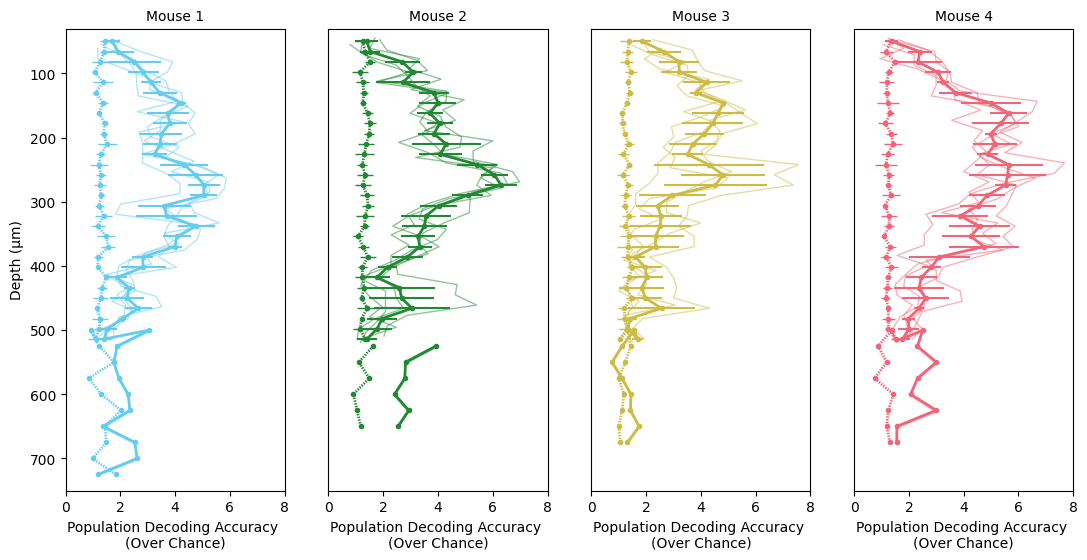

In [35]:
jitter_amount = 5
num_elements = len(column_ids)
jitter_step = jitter_amount * 2 / (num_elements - 1)
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
fixed_jitters = np.tile(jitter_values, (n_depths, 1))
titles = [
    'Mouse 1',
    'Mouse 2',
    'Mouse 3',
    'Mouse 4',
    'All Mice'
]

fig = plt.figure(figsize=(13, 6))

for m, mouse_id in enumerate(mice):
    
    ax = plt.subplot(1, n_mice, m + 1)
    mouse_color = mouse_colors[mice[m]]

    for c, column_id in enumerate(column_ids):
        means = []
        std_errors = []
        for z in range(n_depths):
            bootstrapped_values = bootstrapped_data[:, z, m, c]
            mean = np.mean(bootstrapped_values)
            std = np.std(bootstrapped_values)
            
            means.append(mean)
            std_errors.append(std)

        jitter = fixed_jitters[:, 3-c]
        y_positions = np.array([int(np.mean(x)) for x in all_depths]) + jitter

        # plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=2, linewidth=1)
        plt.plot(means, y_positions, color=mouse_color, linewidth=1, alpha=0.5)
    
    means = []
    std_errors = []
    for z in range(n_depths):
        bootstrapped_values = bootstrapped_data[:, z, m, :]
        bootstrapped_values = bootstrapped_values[~np.isnan(bootstrapped_values)]
        mean = np.mean(bootstrapped_values)
        std = np.std(bootstrapped_values)
        
        means.append(mean)
        std_errors.append(std)

    y_positions = np.array([int(np.mean(x)) for x in all_depths])
    
    plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=3)
    plt.plot(means, y_positions, color=mouse_color, linewidth=2)

    means = []
    std_errors = []
    for z in range(n_depths):
        bootstrapped_values = shuf_bootstrapped_data[:, z, m, :]
        bootstrapped_values = bootstrapped_values[~np.isnan(bootstrapped_values)]
        mean = np.mean(bootstrapped_values)
        std = np.std(bootstrapped_values)
        
        means.append(mean)
        std_errors.append(std)
    
    y_positions = np.array([int(np.mean(x)) for x in all_depths])
    plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=3, linewidth=1)
    plt.plot(means, y_positions, color=mouse_color, linewidth=2, linestyle=(0, (0.5, 0.5)))

    plt.xlabel('Population Decoding Accuracy \n(Over Chance)', fontsize=10)
    plt.title(titles[m], fontsize=10)

    if m == 0:
        plt.yticks(fontsize=10)
        plt.ylabel("Depth (µm)", fontsize=10)
    else:
        plt.yticks([])

    plt.xticks(fontsize=10)
    plt.ylim(30, 750)
    plt.xlim(0, 8)
    plt.gca().invert_yaxis()
# plt.show()
# plt.savefig(os.path.join(figures_dir, '5A_decoding_accuracy_DGW.svg'), format='svg', bbox_inches='tight', dpi=300)

In [36]:
n_bootstrap = 1000
n_depths = len(all_depths)
mouse_ids_mod = [409828, 416296, 427836, 438833]
n_mice = len(mouse_ids_mod)
column_ids = [1, 2, 3, 4, 5]
n_columns = len(column_ids)
bootstrapped_data = np.zeros((n_bootstrap, n_depths, n_mice, n_columns))

stim_type = 'natural_images_12'
decode_dim = 'image_index'

for m, mouse_id in enumerate(mouse_ids_mod):
    for c, column_id in enumerate(column_ids):
        for z, depth in enumerate(all_depths):
                test_accuracies_mean = all_results_df[
                    (all_results_df['mouse_id'] == mouse_id) & 
                    (all_results_df['depth'] == depth) &
                    (all_results_df['stim_type'] == stim_type) &
                    (all_results_df['decode_dim'] == decode_dim) & 
                    (all_results_df['column_id'] == column_id)
                    ].test_accuracies_mean.values
                    
                if len(test_accuracies_mean) > 0:
                    bootstrapped_data[:, z, m, c] = test_accuracies_mean
                else:
                    print(f"Missing data for {stim_type}, {decode_dim}, {mouse_id}, {column_id}, {depth}")
                    bootstrapped_data[:, z, m, c] = np.nan
                    continue

bootstrapped_data = bootstrapped_data / (1/12)

Missing data for natural_images_12, image_index, 409828, 1, 50
Missing data for natural_images_12, image_index, 409828, 1, 66
Missing data for natural_images_12, image_index, 409828, 1, 82
Missing data for natural_images_12, image_index, 409828, 1, 98
Missing data for natural_images_12, image_index, 409828, 1, 114
Missing data for natural_images_12, image_index, 409828, 1, 130
Missing data for natural_images_12, image_index, 409828, 1, 146
Missing data for natural_images_12, image_index, 409828, 1, 162
Missing data for natural_images_12, image_index, 409828, 1, 178
Missing data for natural_images_12, image_index, 409828, 1, 194
Missing data for natural_images_12, image_index, 409828, 1, 210
Missing data for natural_images_12, image_index, 409828, 1, 226
Missing data for natural_images_12, image_index, 409828, 1, 242
Missing data for natural_images_12, image_index, 409828, 1, 258
Missing data for natural_images_12, image_index, 409828, 1, 274
Missing data for natural_images_12, image_in

In [37]:
n_bootstrap = 1000
n_depths = len(all_depths)
mouse_ids_mod = [409828, 416296, 427836, 438833]
n_mice = len(mouse_ids_mod)
column_ids = [1, 2, 3, 4, 5]
n_columns = len(column_ids)
shuf_bootstrapped_data = np.zeros((n_bootstrap, n_depths, n_mice, n_columns))

stim_type = 'drifting_gratings_windowed'
decode_dim = 'direction'

for m, mouse_id in enumerate(mouse_ids_mod):
    for c, column_id in enumerate(column_ids):
        for z, depth in enumerate(all_depths):
                shuf_test_accuracies_mean = all_results_df[
                    (all_results_df['mouse_id'] == mouse_id) & 
                    (all_results_df['depth'] == depth) &
                    (all_results_df['stim_type'] == stim_type) &
                    (all_results_df['decode_dim'] == decode_dim) & 
                    (all_results_df['column_id'] == column_id)
                    ].shuf_test_accuracies_mean.values
                    
                if len(shuf_test_accuracies_mean) > 0:
                    shuf_bootstrapped_data[:, z, m, c] = shuf_test_accuracies_mean
                else:
                    print(f"Missing data for {stim_type}, {decode_dim}, {mouse_id}, {column_id}, {depth}")
                    shuf_bootstrapped_data[:, z, m, c] = np.nan
                    continue

shuf_bootstrapped_data = shuf_bootstrapped_data / (1/12)

Missing data for drifting_gratings_windowed, direction, 409828, 1, 50
Missing data for drifting_gratings_windowed, direction, 409828, 1, 66
Missing data for drifting_gratings_windowed, direction, 409828, 1, 82
Missing data for drifting_gratings_windowed, direction, 409828, 1, 98
Missing data for drifting_gratings_windowed, direction, 409828, 1, 114
Missing data for drifting_gratings_windowed, direction, 409828, 1, 130
Missing data for drifting_gratings_windowed, direction, 409828, 1, 146
Missing data for drifting_gratings_windowed, direction, 409828, 1, 162
Missing data for drifting_gratings_windowed, direction, 409828, 1, 178
Missing data for drifting_gratings_windowed, direction, 409828, 1, 194
Missing data for drifting_gratings_windowed, direction, 409828, 1, 210
Missing data for drifting_gratings_windowed, direction, 409828, 1, 226
Missing data for drifting_gratings_windowed, direction, 409828, 1, 242
Missing data for drifting_gratings_windowed, direction, 409828, 1, 258
Missing da

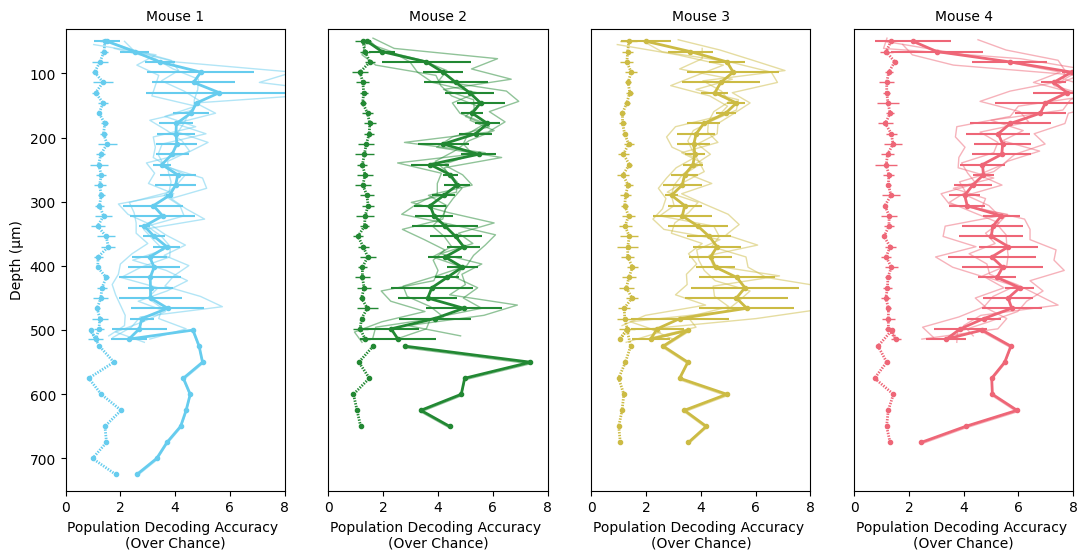

In [38]:
jitter_amount = 5
num_elements = len(column_ids)
jitter_step = jitter_amount * 2 / (num_elements - 1)
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
fixed_jitters = np.tile(jitter_values, (n_depths, 1))
titles = [
    'Mouse 1',
    'Mouse 2',
    'Mouse 3',
    'Mouse 4',
    'All Mice'
]

fig = plt.figure(figsize=(13, 6))

for m, mouse_id in enumerate(mice):
    
    ax = plt.subplot(1, n_mice, m + 1)
    mouse_color = mouse_colors[mice[m]]

    for c, column_id in enumerate(column_ids):
        means = []
        std_errors = []
        for z in range(n_depths):
            bootstrapped_values = bootstrapped_data[:, z, m, c]
            mean = np.mean(bootstrapped_values)
            std = np.std(bootstrapped_values)
            
            means.append(mean)
            std_errors.append(std)

        jitter = fixed_jitters[:, 3-c]
        y_positions = np.array([int(np.mean(x)) for x in all_depths]) + jitter

        # plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=2, linewidth=1)
        plt.plot(means, y_positions, color=mouse_color, linewidth=1, alpha=0.5)
    
    means = []
    std_errors = []
    for z in range(n_depths):
        bootstrapped_values = bootstrapped_data[:, z, m, :]
        bootstrapped_values = bootstrapped_values[~np.isnan(bootstrapped_values)]
        mean = np.mean(bootstrapped_values)
        std = np.std(bootstrapped_values)
        
        means.append(mean)
        std_errors.append(std)

    y_positions = np.array([int(np.mean(x)) for x in all_depths])
    
    plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=3)
    plt.plot(means, y_positions, color=mouse_color, linewidth=2)

    means = []
    std_errors = []
    for z in range(n_depths):
        bootstrapped_values = shuf_bootstrapped_data[:, z, m, :]
        bootstrapped_values = bootstrapped_values[~np.isnan(bootstrapped_values)]
        mean = np.mean(bootstrapped_values)
        std = np.std(bootstrapped_values)
        
        means.append(mean)
        std_errors.append(std)
    
    y_positions = np.array([int(np.mean(x)) for x in all_depths])
    plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=3, linewidth=1)
    plt.plot(means, y_positions, color=mouse_color, linewidth=2, linestyle=(0, (0.5, 0.5)))

    plt.xlabel('Population Decoding Accuracy \n(Over Chance)', fontsize=10)
    plt.title(titles[m], fontsize=10)

    if m == 0:
        plt.yticks(fontsize=10)
        plt.ylabel("Depth (µm)", fontsize=10)
    else:
        plt.yticks([])

    plt.xticks(fontsize=10)
    plt.ylim(30, 750)
    plt.xlim(0, 8)
    plt.gca().invert_yaxis()
# plt.show()
# plt.savefig(os.path.join(figures_dir, '5A_decoding_accuracy_DGW.svg'), format='svg', bbox_inches='tight', dpi=300)